# **Machine Learning in Python: Making Receiver Operating Characteristic (ROC) curve**

Chanin Nantasenamat

<i>Data Professor YouTube channel, http://youtube.com/dataprofessor </i>

In this Jupyter notebook, we will be making a Receiver Operating Characteristic (ROC) curve using the Iris data set as an example.

## **What is ROC curve?**

The **ROC curve** summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

## **Generate synthetic dataset**

In [28]:
from sklearn.datasets import make_classification
import numpy as np

In [29]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

## **Add noisy features to make the problem more difficult** $^1$


In [30]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

## **Data splitting**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [33]:
Y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,

In [34]:
type(Y_test)

numpy.ndarray

## **Build classification model**

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### Random Forest

In [36]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

### Naive Bayes

In [37]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

## **Prediction probabilities** $^2$

In [38]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [39]:
print(rf_probs)

[[0.552 0.448]
 [0.53  0.47 ]
 [0.538 0.462]
 [0.502 0.498]
 [0.498 0.502]
 [0.456 0.544]
 [0.448 0.552]
 [0.418 0.582]
 [0.448 0.552]
 [0.508 0.492]
 [0.474 0.526]
 [0.538 0.462]
 [0.506 0.494]
 [0.532 0.468]
 [0.554 0.446]
 [0.55  0.45 ]
 [0.564 0.436]
 [0.484 0.516]
 [0.49  0.51 ]
 [0.482 0.518]
 [0.532 0.468]
 [0.444 0.556]
 [0.512 0.488]
 [0.526 0.474]
 [0.552 0.448]
 [0.476 0.524]
 [0.522 0.478]
 [0.472 0.528]
 [0.466 0.534]
 [0.51  0.49 ]
 [0.492 0.508]
 [0.474 0.526]
 [0.506 0.494]
 [0.524 0.476]
 [0.552 0.448]
 [0.468 0.532]
 [0.474 0.526]
 [0.538 0.462]
 [0.486 0.514]
 [0.468 0.532]
 [0.548 0.452]
 [0.506 0.494]
 [0.478 0.522]
 [0.556 0.444]
 [0.44  0.56 ]
 [0.486 0.514]
 [0.462 0.538]
 [0.512 0.488]
 [0.462 0.538]
 [0.5   0.5  ]
 [0.51  0.49 ]
 [0.494 0.506]
 [0.562 0.438]
 [0.51  0.49 ]
 [0.448 0.552]
 [0.484 0.516]
 [0.554 0.446]
 [0.57  0.43 ]
 [0.524 0.476]
 [0.478 0.522]
 [0.472 0.528]
 [0.462 0.538]
 [0.464 0.536]
 [0.498 0.502]
 [0.52  0.48 ]
 [0.464 0.536]
 [0.432 0.

Two columns corresponding to the probability of the sample to be classified as each of the possible classes. The first column corresponds to the probability for the class 0 and the second one, for the class 1. 

Probabilities for the positive outcome is kept.

In [41]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

## **Computing AUROC and ROC curve values**

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

### **Calculate AUROC**
**ROC** is the receiver operating characteristic
**AUROC** is the area under the ROC curve

In [44]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

### **Print AUROC scores**

In [45]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.918
Naive Bayes: AUROC = 0.993


### **Calculate ROC curve**

In [46]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, thresholds = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

In [53]:
print(rf_probs[rf_probs>0.9])

[]


In [49]:
print(thresholds)

[1.584 0.584 0.58  0.578 0.576 0.574 0.568 0.566 0.564 0.562 0.558 0.556
 0.554 0.552 0.55  0.548 0.546 0.544 0.542 0.54  0.538 0.536 0.534 0.532
 0.53  0.528 0.526 0.524 0.522 0.52  0.518 0.516 0.514 0.512 0.51  0.508
 0.506 0.504 0.502 0.498 0.496 0.494 0.492 0.49  0.488 0.486 0.484 0.482
 0.48  0.478 0.476 0.474 0.472 0.47  0.468 0.466 0.464 0.462 0.46  0.458
 0.456 0.454 0.452 0.45  0.446 0.438 0.434 0.432 0.43  0.42 ]


## **Plot the ROC curve**

In [37]:
import matplotlib.pyplot as plt

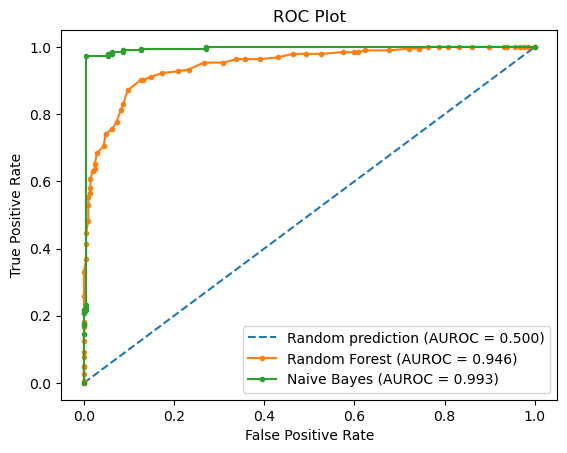

In [38]:

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## **Reference**
1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
2. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


---

## DEMO OF THE "roc_curve" function

Do notice that the "roc_curve" function receives the probability of samples to be predicted as positive samples. In the case above, the positive sample label is said to be "2" and as such the given probability values refer to the probability of being "2"

In [33]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
print("The FPR values are: ", fpr)
print("The TPR values are: ",tpr)

print("The thresholds values are: ", thresholds)

The FPR values are:  [0.  0.  0.5 0.5 1. ]
The TPR values are:  [0.  0.5 0.5 1.  1. ]
The thresholds values are:  [1.8  0.8  0.4  0.35 0.1 ]


From above, the first value of the thresholds is must not be considered. And as well, the last values of FPR and TPR are not taken into account. Hence, the relation among these three variables will be:

FPR = [0, 0, 0.5, 0.5]

TPR = [0, 0.5, 0.5, 1]

Thresholds = [0.8, 0.4, 0.35, 0.1]



Verifying that the above statement is true:

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, SpecificityAtSensitivity
from sklearn.metrics import confusion_matrix

In [40]:
def pred_label_onProb(probs_list, prob_threshold):
    pred_based_onProb = []
    for i in range (len(probs_list)):
        if probs_list[i] > prob_threshold:
            prediction = 2                          ## Stands for classifiaction of anomaly bottle
        else:
            prediction = 1
        pred_based_onProb.append(prediction)
    return pred_based_onProb

In [41]:
pred_label_onProb([0.1, 0.4, 0.35, 0.8], 0.8)

[1, 1, 1, 1]

In [45]:
conf_matrix = confusion_matrix([1, 1, 2, 2], pred_label_onProb([0.1, 0.4, 0.35, 0.8], 0.4))
print(conf_matrix)
_tp = conf_matrix[1, 1]
_fn = conf_matrix[1, 0]
_fp = conf_matrix[0, 1]
_tn = conf_matrix[0, 0]
_tpr = _tp/(_tp+_fn)
_fpr = _fp / (_tn + _fp)
print("The FPR values are: ", _fpr)
print("The TPR values are: ", _tpr)
print("Using the threshold = 0.4")

[[2 0]
 [1 1]]
The FPR values are:  0.0
The TPR values are:  0.5
Using the threshold = 0.4


In [46]:
conf_matrix = confusion_matrix([1, 1, 2, 2], pred_label_onProb([0.1, 0.4, 0.35, 0.8], 0.35))
print(conf_matrix)
_tp = conf_matrix[1, 1]
_fn = conf_matrix[1, 0]
_fp = conf_matrix[0, 1]
_tn = conf_matrix[0, 0]
_tpr = _tp/(_tp+_fn)
_fpr = _fp / (_tn + _fp)
print("The FPR values are: ", _fpr)
print("The TPR values are: ", _tpr)
print("Using the threshold = 0.35")

[[1 1]
 [1 1]]
The FPR values are:  0.5
The TPR values are:  0.5
Using the threshold = 0.35


In [47]:
conf_matrix = confusion_matrix([1, 1, 2, 2], pred_label_onProb([0.1, 0.4, 0.35, 0.8], 0.1))
print(conf_matrix)
_tp = conf_matrix[1, 1]
_fn = conf_matrix[1, 0]
_fp = conf_matrix[0, 1]
_tn = conf_matrix[0, 0]
_tpr = _tp/(_tp+_fn)
_fpr = _fp / (_tn + _fp)
print("The FPR values are: ", _fpr)
print("The TPR values are: ", _tpr)
print("Using the threshold = 0.1")

[[1 1]
 [0 2]]
The FPR values are:  0.5
The TPR values are:  1.0
Using the threshold = 0.1
